# Pump it up: Data Mining and the water table

Hello y'all, today I will be running my solution for a water's pump predictive maintenance. This dataset was firstly difused by [drivendata.org](drivendata.org) in order to propose a cheaper solution for Tanzania's water distribution. 

I'll do this in five parts as listed below: 

* Gathering and Exploring Data
* Processing data
* Researching a model that fits 
* Training and Testing 
* Evaluation

### 1. Gathering and Exploring Data
Here, the first thing is see what data looks like and get the next further steps. 

In [1]:
import pandas as pd
df_values = pd.read_csv (r'G:\Meu Drive\UFRJ Disciplinas\Projeto Final\pump-it-up-data-mining-the-water-table\Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')
df_labels = pd.read_csv (r'G:\Meu Drive\UFRJ Disciplinas\Projeto Final\pump-it-up-data-mining-the-water-table\Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')
df = pd.merge (df_values,df_labels, how = 'inner')

# exploring data 
df.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

* As we can see, most of our variables are categorical. I've chosen a subset of data to explore and test its influences on the variable that we want predict. The variables was chosen based in some criterias 

In [3]:
df_eda = df[['id','permit','date_recorded','amount_tsh','gps_height','longitude','latitude','wpt_name','region','population','public_meeting','construction_year','payment','source','waterpoint_type','status_group','quantity','basin']]
df_eda['status_group'] = df_eda['status_group'].str.replace('functional needs repair','needs repair')
df_eda['status_group'] = df_eda['status_group'].str.replace('non functional','needs repair')

df_eda.describe()

C:\Users\Asaph Tinoco\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Asaph Tinoco\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,amount_tsh,gps_height,longitude,latitude,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,30500.000000,2013.000000


#### We'll be exploring our numerical data and then run our EDA

As we can see below, there are many missing *construction year* value. Then further we'll handle this values in order to going foward with our analysis

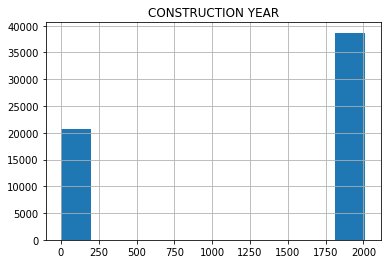

In [4]:
import matplotlib.pyplot as plt
graph_1 = df_eda['construction_year'].hist()
plt.title('CONSTRUCTION YEAR')
plt.show(graph_1)

Text(0.5, 1.0, 'PERMISSION TO ACCESS DATA POINT')

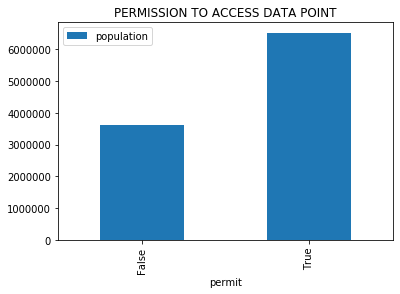

In [5]:
test = df_eda[['population','permit']]
test_groupby = test.groupby('permit')
test_groupby.sum().plot.bar()
plt.title('PERMISSION TO ACCESS DATA POINT')

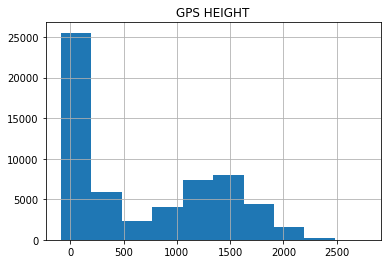

In [6]:
graph_1 = df_eda['gps_height'].hist()
plt.title('GPS HEIGHT')
plt.show(graph_1)

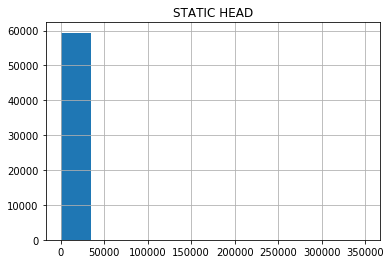

In [7]:
graph_1 = df_eda['amount_tsh'].hist()
plt.title('STATIC HEAD')
plt.show(graph_1)

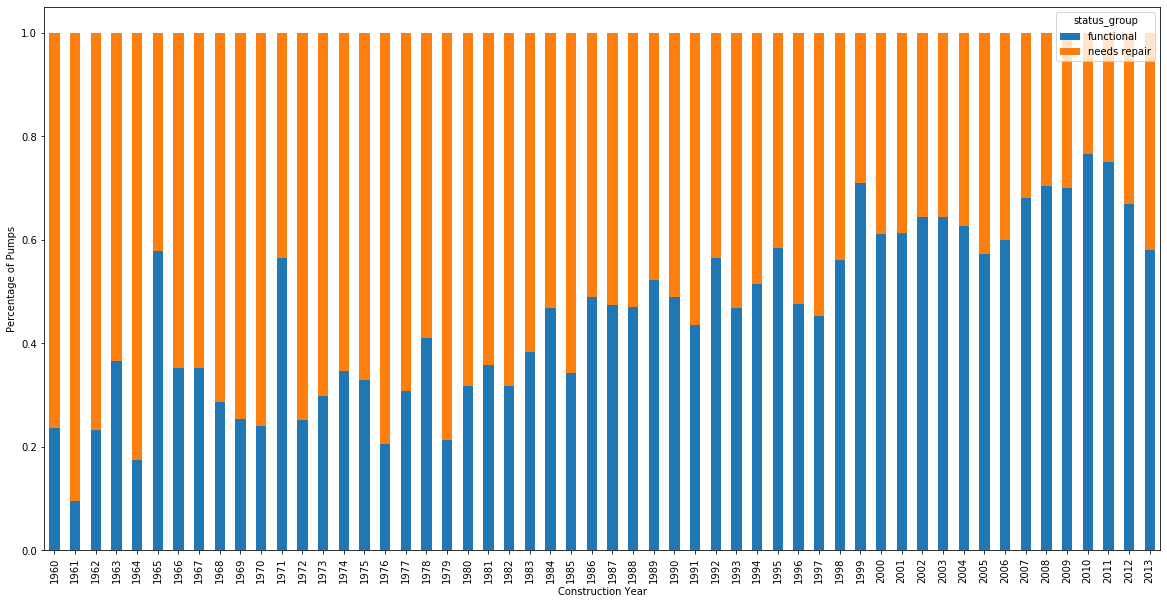

In [8]:
import matplotlib.pyplot as plt
import matplotlib

df_eda_year = df_eda[df_eda['construction_year'] != 0][['construction_year','status_group']]
ct = pd.crosstab(df_eda_year.construction_year, df_eda_year.status_group,normalize='index')

ct.plot.bar(stacked=True,figsize=(20,10))
plt.legend(title='status_group')
plt.ylabel('Percentage of Pumps')
plt.xlabel('Construction Year')
plt.show()

C:\Users\Asaph Tinoco\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


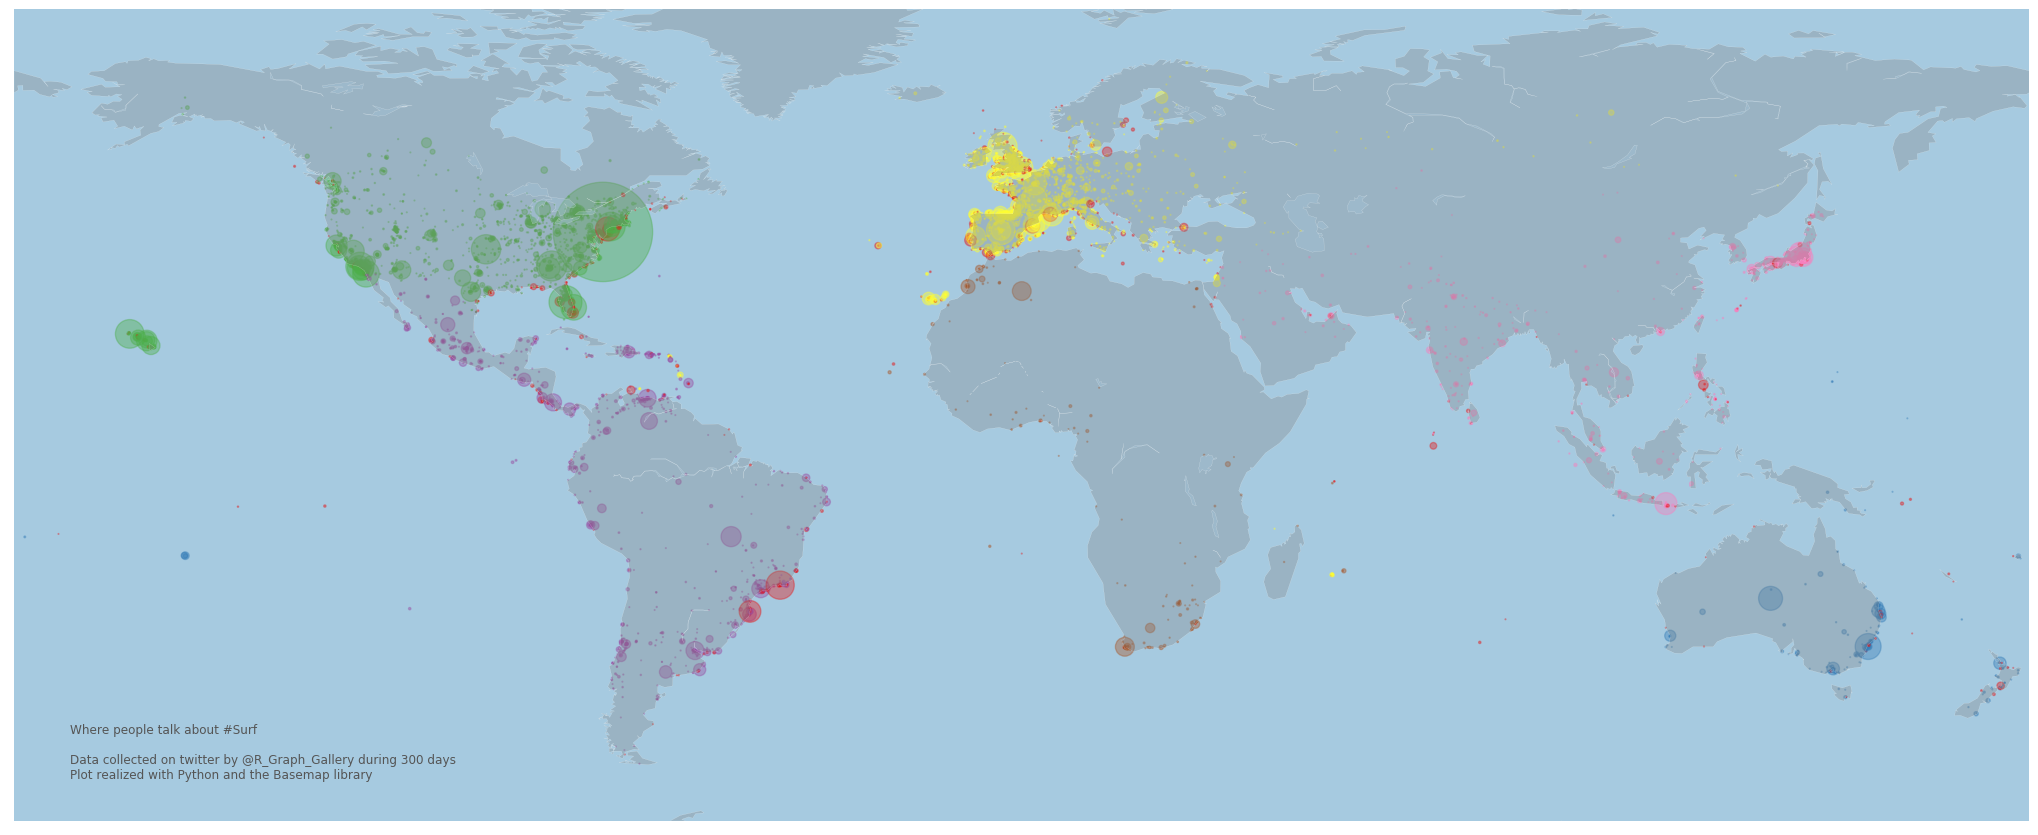

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['PROJ_LIB'] = r'C:\Users\Asaph Tinoco\anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap
# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# read the data (on the web)
data = pd.read_csv('http://python-graph-gallery.com/wp-content/uploads/TweetSurfData.csv', sep=";")
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 
# Add a point per position
m.scatter(data['homelon'], data['homelat'], s=data['n']/6, alpha=0.4, c=data['labels_enc'], cmap="Set1")
 
# copyright and source data info
plt.text( -170, -58,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' )
 
# Save as png
plt.savefig('#315_Tweet_Surf_Bubble_map1.png', bbox_inches='tight')


In [26]:
# Import libraries
import pandas as pd
import folium
import os
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join('/Users/y.holtz/Desktop/', 'us-states.json')

print(state_unemployment)

# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
state_unemployment = os.path.join('/Users/y.holtz/Desktop/', 'US_Unemployment_Oct2012.csv')
state_data = pd.read_csv(state_unemployment)
 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'Unemployment'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#292_folium_chloropleth_USA1.html')

/Users/y.holtz/Desktop/US_Unemployment_Oct2012.csv


FileNotFoundError: [Errno 2] File /Users/y.holtz/Desktop/US_Unemployment_Oct2012.csv does not exist: '/Users/y.holtz/Desktop/US_Unemployment_Oct2012.csv'

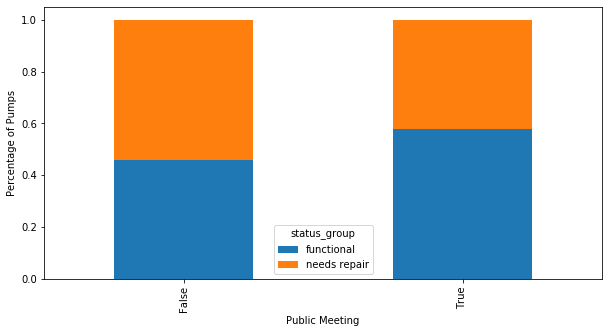

In [9]:
df_eda_pm = df_eda[df_eda['construction_year'] != 0][['public_meeting','status_group']]
ct = pd.crosstab(df_eda_pm.public_meeting, df_eda_pm.status_group,normalize='index')
ct.plot.bar(stacked=True,figsize=(10,5))
plt.legend(title='status_group')
plt.ylabel('Percentage of Pumps')
plt.xlabel('Public Meeting')
plt.show()

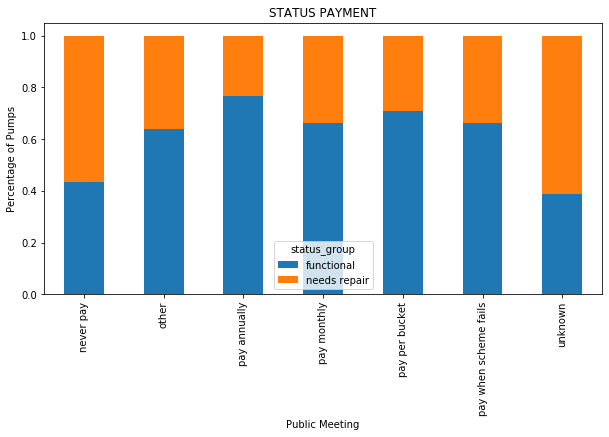

In [10]:
df_eda_pay = df_eda[df_eda['construction_year'] != 0][['payment','status_group']]
ct = pd.crosstab(df_eda_pay.payment, df_eda_pay.status_group,normalize='index')
ct.plot.bar(stacked=True,figsize=(10,5))
plt.title('STATUS PAYMENT')
plt.ylabel('Percentage of Pumps')
plt.xlabel('Public Meeting')
plt.show()

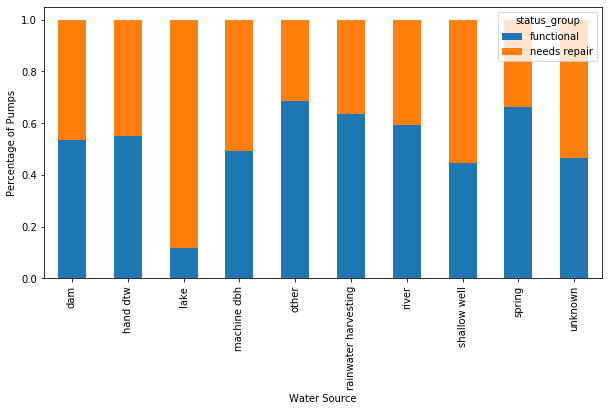

In [11]:
df_eda_pay = df_eda[df_eda['construction_year'] != 0][['source','status_group']]
ct = pd.crosstab(df_eda_pay.source, df_eda_pay.status_group,normalize='index')
ct.plot.bar(stacked=True,figsize=(10,5))
plt.title('')
plt.ylabel('Percentage of Pumps')
plt.xlabel('Water Source')
plt.show()

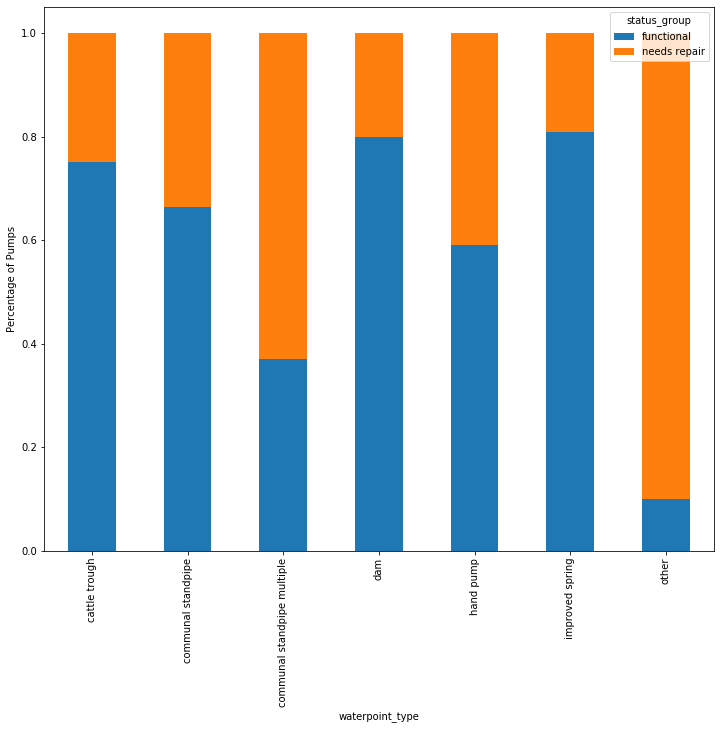

In [12]:
df_eda_pay = df_eda[df_eda['construction_year'] != 0][['waterpoint_type','status_group']]
ct = pd.crosstab(df_eda_pay.waterpoint_type, df_eda_pay.status_group,normalize='index')
ct.plot.bar(stacked=True,figsize=(12,10))
plt.legend(title='status_group')
plt.ylabel('Percentage of Pumps')
plt.xlabel('waterpoint_type')
plt.show()

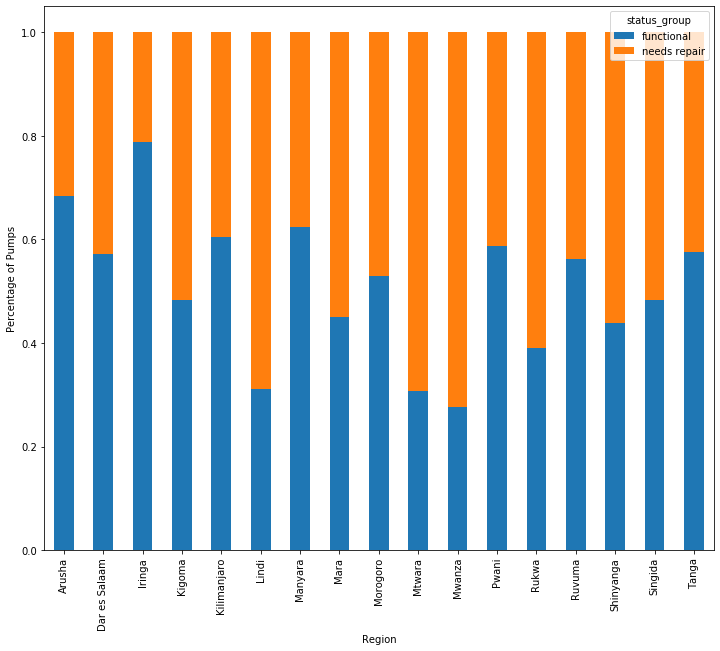

In [13]:
df_eda_pay = df_eda[df_eda['construction_year'] != 0][['region','status_group']]
ct = pd.crosstab(df_eda_pay.region, df_eda_pay.status_group,normalize='index')
ct.plot.bar(stacked=True,figsize=(12,10))
plt.legend(title='status_group')
plt.ylabel('Percentage of Pumps')
plt.xlabel('Region')
plt.show()

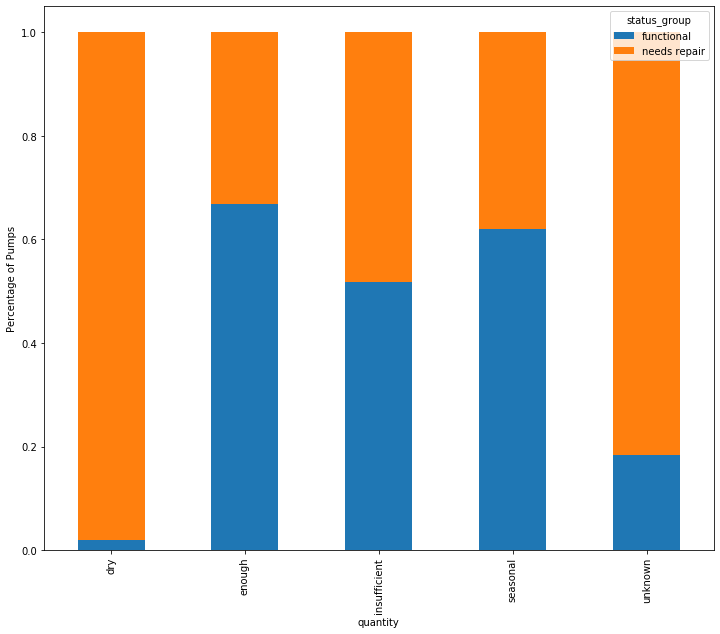

In [14]:
df_eda_pay = df_eda[df_eda['construction_year'] != 0][['quantity','status_group']]
ct = pd.crosstab(df_eda_pay.quantity, df_eda_pay.status_group,normalize='index')
ct.plot.bar(stacked=True,figsize=(12,10))
plt.legend(title='status_group')
plt.ylabel('Percentage of Pumps')
plt.xlabel('quantity')
plt.show()

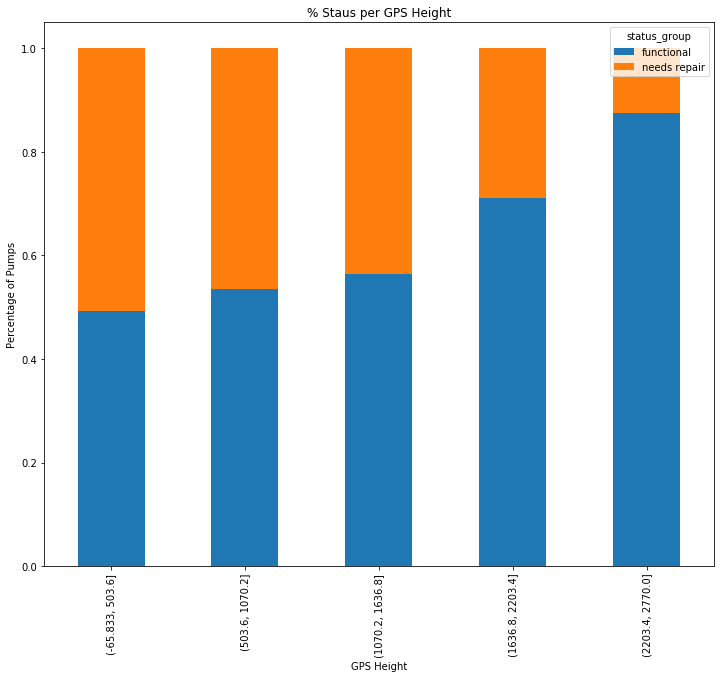

In [15]:
df_eda_pay = df_eda[df_eda['construction_year'] != 0][['gps_height','status_group']]
df_eda_pay['gps_height_cut'] = pd.cut(df_eda_pay['gps_height'],5)
ct = pd.crosstab(df_eda_pay.gps_height_cut, df_eda_pay.status_group,normalize='index')
ct.plot.bar(stacked=True,figsize=(12,10))
plt.title('% Staus per GPS Height')
plt.ylabel('Percentage of Pumps')
plt.xlabel('GPS Height')
plt.show()

### Another important observations is the *static head* 

* This variable mean the amount of energy needed by the pump to move a amount os mass (of water). 
* We can clearly see that pumps with lower heads are likely to fail 

C:\Users\Asaph Tinoco\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


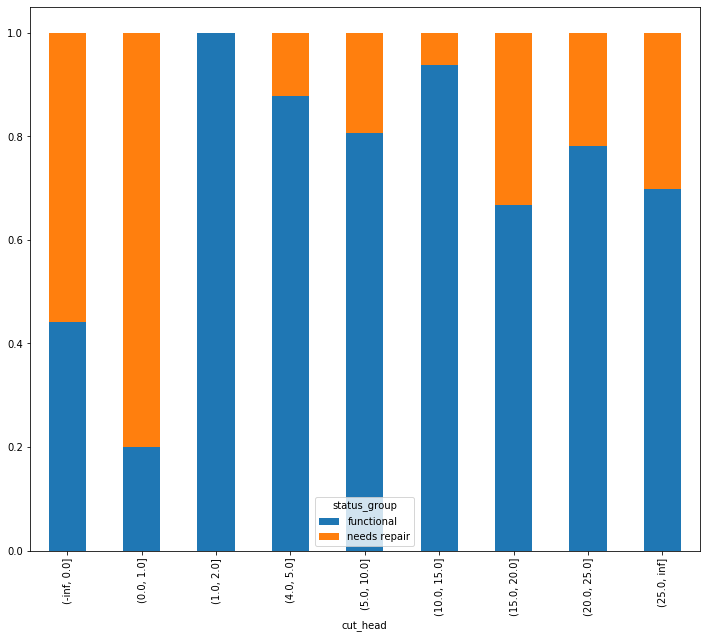

In [16]:
import numpy as np 

df_head = df_eda[df_eda['construction_year']!= 0]
df_head['cut_head'] = pd.cut(df_eda['amount_tsh'],bins = [-np.inf,0,1,2,3,4,5,10,15,20,25, np.inf])
df_head['cut_head'].value_counts()
ct = pd.crosstab(df_head['cut_head'],df_head['status_group'],normalize = 'index')
ct.plot.bar(stacked=True,figsize=(12,10))

* We have almost 30% of our dataset with null values for year, as we're handle with large dataset, i'll be deleting these rows 
* I'll be choosing region data instead of longitude and latitude data, but I'll keep gps height. 

### 2. Preprocessing Data
#### 2.1 Inputation
* As seen before, about 30% of the variable *construction year* is missing, then I've chosen to drop all rows concerned, given that we have a large data set...

#### 2.2 Binning
* For those who pay, instead of split in many classifications as it is, I'll be replacing by only for who pay, not pay and unknow
* For tsh_amount (the static head) I will be classifying into 3 categories (low,mid,high)
* Instead of *construction year* I'll be replacing by year of use: That will be de difference bewtween *construction year* and *date recorded*

In [41]:
#Filtering Year
df_eda_bin = df[['id','permit','date_recorded','extraction_type_class','amount_tsh','gps_height','wpt_name','region','population','public_meeting','construction_year','payment','source','waterpoint_type','status_group','quantity','latitude','longitude','basin']]
df_eda_bin = df_eda_bin[df_eda_bin['construction_year']!=0]

# Payment
df_eda_bin['payment'] = df_eda_bin['payment'].str.replace('pay annually','pay')
df_eda_bin['payment'] = df_eda_bin['payment'].str.replace('pay per bucket','pay')
df_eda_bin['payment'] = df_eda_bin['payment'].str.replace('pay annually','pay')
df_eda_bin['payment'] = df_eda_bin['payment'].str.replace('pay monthly','pay')
df_eda_bin['payment'] = df_eda_bin['payment'].str.replace('pay when scheme fails','pay')

#Water Type
df_eda_bin['waterpoint_type'] = df_eda_bin['waterpoint_type'].str.replace('communal standpipe multiple','communal standpipe')

#Static Head
df_eda_bin['amount_tsh_cut'] = pd.cut(df_eda_bin['amount_tsh'], bins = [-np.inf,1,15, np.inf], labels = ['Low', 'Mid', 'High'])


# Year of use
pd.to_datetime(df_eda_bin['date_recorded'])
df_eda_bin['recorded_date_year'] = pd.DatetimeIndex(df_eda_bin['date_recorded']).year
df_eda_bin['usage_period'] =  df_eda_bin['recorded_date_year'] - df_eda_bin['construction_year']
df_eda_bin = df_eda_bin[df_eda_bin['usage_period'] >= 0]

# Status Group 
df_eda_bin['status_group'] = df_eda_bin['status_group'].str.replace('functional needs repair','needs repair')
df_eda_bin['status_group'] = df_eda_bin['status_group'].str.replace('non functional','needs repair')

#
df_eda_bin['gps_height_cut'] = pd.cut(df_eda_bin['gps_height'], 5, labels = ['Low', 'Mid-Low','Mid','Mid-High', 'High'])

df_eda_bin.head()
df_eda_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38682 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     38682 non-null  int64   
 1   permit                 36755 non-null  object  
 2   date_recorded          38682 non-null  object  
 3   extraction_type_class  38682 non-null  object  
 4   amount_tsh             38682 non-null  float64 
 5   gps_height             38682 non-null  int64   
 6   wpt_name               38682 non-null  object  
 7   region                 38682 non-null  object  
 8   population             38682 non-null  int64   
 9   public_meeting         36377 non-null  object  
 10  construction_year      38682 non-null  int64   
 11  payment                38682 non-null  object  
 12  source                 38682 non-null  object  
 13  waterpoint_type        38682 non-null  object  
 14  status_group           38682 non-null 

construction_year    1997.0
dtype: category
Categories (1, float64): [1997.0]

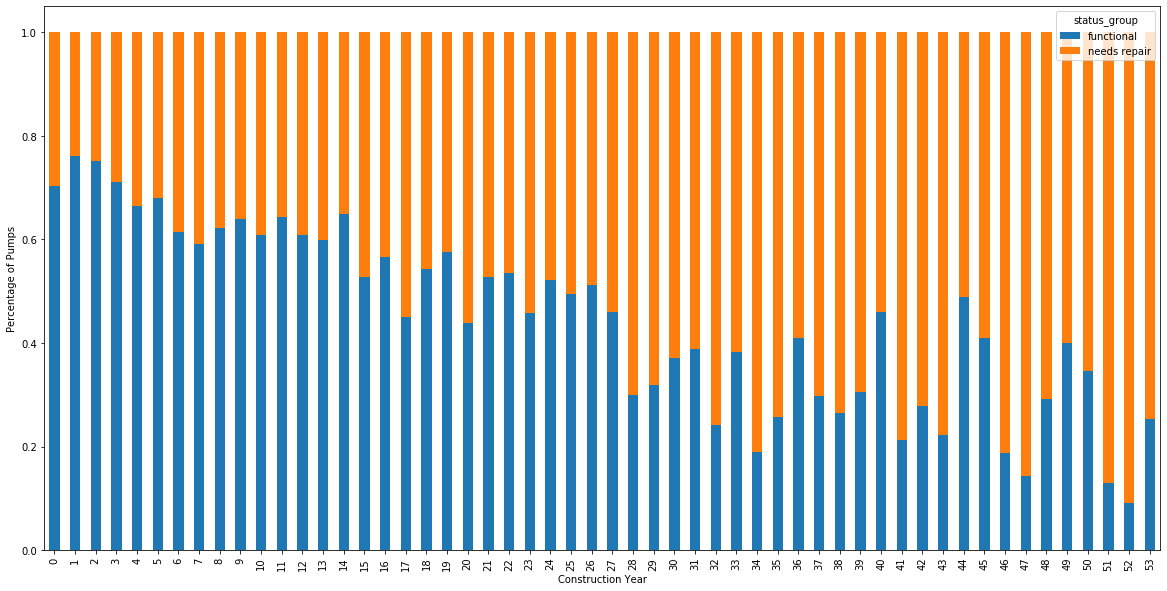

In [34]:
ct = pd.crosstab(df_eda_bin.usage_period, df_eda_bin.status_group,normalize='index')
ct.plot.bar(stacked=True,figsize=(20,10))
plt.legend(title='status_group')
plt.ylabel('Percentage of Pumps')
plt.xlabel('Construction Year')
plt.show()

In [40]:
#### 2.3 One-Hot Encoding
df_n_dummies = df_eda_bin[['usage_period','latitude','longitude','status_group']]
df_dummies = df_eda_bin[['waterpoint_type','payment','region','source','quantity','basin','gps_height_cut','extraction_type_class']]
df_dummies = pd.get_dummies(df_dummies, drop_first = True)
df_train_test = pd.concat([df_dummies, df_n_dummies], axis = 1)
df_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38682 entries, 0 to 59399
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   waterpoint_type_communal standpipe  38682 non-null  uint8  
 1   waterpoint_type_dam                 38682 non-null  uint8  
 2   waterpoint_type_hand pump           38682 non-null  uint8  
 3   waterpoint_type_improved spring     38682 non-null  uint8  
 4   waterpoint_type_other               38682 non-null  uint8  
 5   payment_other                       38682 non-null  uint8  
 6   payment_pay                         38682 non-null  uint8  
 7   payment_unknown                     38682 non-null  uint8  
 8   region_Dar es Salaam                38682 non-null  uint8  
 9   region_Iringa                       38682 non-null  uint8  
 10  region_Kigoma                       38682 non-null  uint8  
 11  region_Kilimanjaro                  38682

In [ ]:
from sklearn.model_selection import train_test_split
y = df_train_test.iloc[:,-1]
X = df_train_test.drop(['status_group'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

y_test.value_counts(1)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000)
# Train the model on training data
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
